# Varied Access to NHS Dentists in England: A Clustering Problem

Unfortunately, oral health and access to NHS dental practices is not the same across England. According to Public Health England, the percentage of 5-year olds visually obvious dental decay varies dramatically from District to District. For example, in Blackburn with Darwen 50.9% of 5-year olds showed obvious tooth decay, compared to Hastings with only 1.1% in 2018/19 (Public Health England, 2021).

There are also stark differences when it comes to the number of dental practices by population. In Ashfield for instance are there only 0.7 dental practices per 10,000 population whereas Westminster, London has 4.1 dental practices per 10,000 population. 

A report by QualityWatch, a research programme by Nuffield Trust and Health Foundation, also found that people living in deprived areas are more likely to suffer from poor dental health (Appleby & Reed, 2017). Therefore, having access to affordable NHS dentists is especially vital in areas with high deprivation levels. 

In this Notebook, a clustering algorithm will be run combining factors such as tooth decay in children, deprivation levels and number of NHS Dental practices by inhabitants and surface area for each Local Authority District in England. The aim is to highlight the geographic differences in dental health and access to affordable dental care across England, allowing the identification of Local Authority Districts that require serious attention.

## Table of contents

* [Part I: Data Sources and Libraries](#first-bullet)
* [Part II: Read in and Pre-Process all Datasets](#second-bullet)
* [Part III: Merge all Datasets into one Dataframe and Prepare for Clustering](#third-bullet)
* [Part IV: Visual Exploration of Features](#fourth-bullet)
* [Part V: Clustering](#fifth-bullet)
* [Part VI: Exploration of Clusters](#seventh-bullet)
* [References](#sixth-bullet)

## Part I: Data Sources and Libraries <a class="anchor" id="first-bullet"></a>

**Variables and Data Sources**

The following data was used for the clustering project to highlight the geographic differences of NHS dental care across England:

**Geographic Data:** This data from December 2019 contains the Longitude, Latitude and surface area in square kilometre for every Local Authority District in England from the Office for National Statistics (Office for National Statistics, 2021). The coordinates will be used to plot the different clusters and Local Authority Districts onto a visual map of England. The surface area will be used to calculate the number of NHS dental practices per square kilometre to give an indication of geographic access to NHS dental practices in an area. The assumption is that the fewer dental practices a District has per square kilometre, the further the patients have to travel to been seen by a dentist. How the practices are geographically distributed within a District has not been taken into consideration in the project.


**Population Data:**  Population data by Local Authority District in England, dated from December 2019, was taken from Office for National Statistics (Office for National Statistics, 2021). It was used to calculate the number of dental practices per 10,000 population for each Local Authority District, which allowed for a like for like comparison among the District with regards to access to NHS dental practices. The higher the number of practices per population the better the access to affordable dental care.

**Tooth Decay Data:** The percentage of 5-year olds with visually obvious dental decay in 2018-19 from Public Health England was used as an indicator for the level of dental health in each District (Public Health England, 2021). Tooth decay in children is an important factor as it forecasts the future impact on the dental health system. Children that have poor dental health are more likely to have dental problems later in life, putting a burden on the health system. Since the values are expressed as percentages, the level of tooth decay in children can be easily compared among the Districts. 

**Deprivation Data:** The Index for Multiple Deprivation (IMD) scores in 2019 obtained from the government statistics on gov.uk were used to indicate the level of deprivation in each Local Authority District. The IMD combines seven different domains to create the overall IMD score and includes Income, Employment, Education, Health, Crime, Barriers to Housing & services and Living Environment. The higher the IMD score in a District, the more deprived the District is relative to other Districts (Ministry of Housing, Communities & Local Government, 2019). The level of deprivation in an area is important to consider as it is more vital to ensure access to affordable dental services in more deprived areas. People on lower income are more reliant on NHS dental services that are reasonably priced (and in some cases even free) compared to private sector services.  

**Dental Practice Data:** The number of NHS dental practices per District in 2020 was taken from  Digital NHS (Digital NHS, 2021). Divided by population and surface area, it served as a measure for access to NHS dental services. The more practices per population and square kilometre the better the access to affordable dental care. Occupancy of the dental practices has not been taken into consideration in this project. It was assumed that all practices are fully occupied. Another assumption was that the number of dentists per practice is roughly the same for all practices.

**Note:** Data from Foursquare was not used in this project as it did not differentiate between NHS and private Dental Practices. Establishing which practices are NHS was essential to ensure that access to affordable dental care could be measured.

**Import Libraries**

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

#import seborn for impactful visualisations
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Part II: Read in and Pre-Process all Datasets <a class="anchor" id="second-bullet"></a>

**Geographic Data**

Read in the csv file with Longitude, Latitude and Surface Area information as of December 2019 from the selected datasource (see Data Sources).

In [2]:
geo_coordinates = pd.read_csv('Local_Authority_Districts__December_2019__Boundaries_UK_BFC.csv')
geo_coordinates.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,9.371262e+07,71011.933949
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677


Let's only keep the relevant columns.

In [3]:
geo_coordinates = geo_coordinates.rename(columns = {'lad19nm':'District','long':'Longitude', 'lat':'Latitude', 'st_areashape':'Area'})
geo_coordinates.head()

,objectid,lad19cd,District,lad19nmw,bng_e,bng_n,Longitude,Latitude,Area,st_lengthshape
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,9.371262e+07,71011.933949
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677


Represent the variable Area in square kilometers so it's a bit more imagainable.

In [4]:
geo_coordinates['Area_square_km'] = geo_coordinates['Area']/1000000
geo_coordinates.head()

,objectid,lad19cd,District,lad19nmw,bng_e,bng_n,Longitude,Latitude,Area,st_lengthshape,Area_square_km
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,9.371262e+07,71011.933949,93.712620
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242,53.881564
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701,245.069509
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928,204.932954
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,197.475689


Only keep the relevant columns.

In [5]:
col_list = ['District','Longitude', 'Latitude','Area_square_km']
geo_coordinates = geo_coordinates[col_list]
geo_coordinates.head()

,District,Longitude,Latitude,Area_square_km
0,Hartlepool,-1.27018,54.676140,93.712620
1,Middlesbrough,-1.21099,54.544670,53.881564
2,Redcar and Cleveland,-1.00608,54.567520,245.069509
3,Stockton-on-Tees,-1.30664,54.556911,204.932954
4,Darlington,-1.56835,54.535339,197.475689


**Population Data**

Read in the csv file with the Population Estimates for each Local Authority District in 2019 from the selected datasource (see Data Sources).

In [6]:
population = pd.read_csv('Population by Local Authority District UK.csv')
population.head(10)

,Population estimates - local authority based by single year of age,Unnamed: 1
0,ONS Crown Copyright Reserved [from Nomis on 10...,NaN
1,Gender :,Total
2,Age :,All Ages
3,NaN,NaN
4,local authority: district / unitary,2019
5,NaN,NaN
6,Darlington,106803
7,County Durham,530094
8,Hartlepool,93663
9,Middlesbrough,140980


Remove the first 6 rows from the data frame.

In [7]:
population = population.drop(population.index[0:6])
population.head()

,Population estimates - local authority based by single year of age,Unnamed: 1
6,Darlington,106803
7,County Durham,530094
8,Hartlepool,93663
9,Middlesbrough,140980
10,Northumberland,322434


Let's rename the column headers so that they are more recognisable.

In [8]:
population = population.rename(columns = {'Population estimates - local authority based by single year of age':'District','Unnamed: 1':'Population'})
population.head()

,District,Population
6,Darlington,106803
7,County Durham,530094
8,Hartlepool,93663
9,Middlesbrough,140980
10,Northumberland,322434


**Tooth Decay Data**

Read in the csv file with the Tooth Decay Data for each Local Authority District in 2018/19 from the selected datasource (see Data Sources).

In [9]:
decay = pd.read_csv('Percentage of obvious decay in 5 year old.csv')
decay.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,AreaName,Area Type,Sex,Age,Category Type,...,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to parent value or percentiles,Time period Sortable,New data,Compared to goal
0,93563,Percentage of 5 year olds with experience of v...,NaN,NaN,E92000001,England,England,Persons,5 yrs,NaN,...,NaN,-,78767.0,NaN,Cannot be calculated,NaN,NaN,20180000,NaN,NaN
1,93563,Percentage of 5 year olds with experience of v...,E92000001,England,E06000008,Blackburn with Darwen,District & UA,Persons,5 yrs,NaN,...,NaN,-,210.0,NaN,NaN,Worse,NaN,20180000,NaN,NaN
2,93563,Percentage of 5 year olds with experience of v...,E92000001,England,E08000004,Oldham,District & UA,Persons,5 yrs,NaN,...,NaN,-,199.0,NaN,NaN,Worse,NaN,20180000,NaN,NaN
3,93563,Percentage of 5 year olds with experience of v...,E92000001,England,E09000015,Harrow,District & UA,Persons,5 yrs,NaN,...,NaN,-,223.0,NaN,NaN,Worse,NaN,20180000,NaN,NaN
4,93563,Percentage of 5 year olds with experience of v...,E92000001,England,E08000019,Sheffield,District & UA,Persons,5 yrs,NaN,...,NaN,-,243.0,NaN,NaN,Worse,NaN,20180000,NaN,NaN


Let's only keep the relevant columns.

In [10]:
col_list = ['Area Code','AreaName', 'Value']
decay = decay[col_list]
decay.head()

,Area Code,AreaName,Value
0,E92000001,England,23.372361
1,E06000008,Blackburn with Darwen,50.904500
2,E08000004,Oldham,43.170400
3,E09000015,Harrow,42.427800
4,E08000019,Sheffield,41.042500


Remove the first record from the dataframe as it is the total average value for England.

In [11]:
decay = decay.drop(decay.index[0:1])
decay.head()

,Area Code,AreaName,Value
1,E06000008,Blackburn with Darwen,50.9045
2,E08000004,Oldham,43.1704
3,E09000015,Harrow,42.4278
4,E08000019,Sheffield,41.0425
5,E08000005,Rochdale,40.6953


Let's rename the column headers.

In [12]:
decay = decay.rename(columns = {'AreaName':'District', 'Value':'Percentage_obvious_decay_5_year_old'})
decay.head()

,Area Code,District,Percentage_obvious_decay_5_year_old
1,E06000008,Blackburn with Darwen,50.9045
2,E08000004,Oldham,43.1704
3,E09000015,Harrow,42.4278
4,E08000019,Sheffield,41.0425
5,E08000005,Rochdale,40.6953


**NHS Dental Practice Data**

Read in csv file with NHS dental practices in 2020 by district codes from https://digital.nhs.uk/services/organisation-data-service/data-downloads/miscellaneous

In [13]:
dental_practices = pd.read_csv('dental_practices_postcodes_2020.csv', header = None)
dental_practices.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,V00001,DENTAL PRACTICE BOARD,Y59,Q88,TEMPLE GROVE,COMPTON PLACE ROAD,NaN,EASTBOURNE,EAST SUSSEX,BN20 8AD,...,C,D,14G,20150401,20200113.0,NaN,NaN,NaN,NaN,0
1,V00003,CRABTREE ROAD DENTAL PRACTICE,Y59,QNX,25 CRABTREE ROAD,NaN,NaN,CRAWLEY,WEST SUSSEX,RH11 7HL,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
2,V00004,DENTAL SURGERY,Y59,QNX,WOODCROFT,BEPTON ROAD,NaN,MIDHURST,WEST SUSSEX,GU29 9HH,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
3,V00005,DENTAL SURGERY,Y59,QNX,31 WICK STREET,WICK,NaN,LITTLEHAMPTON,WEST SUSSEX,BN17 7JJ,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
4,V00006,DENTAL SURGERY,Y59,QNX,43 BUSTICLE LANE,SOMPTING,NaN,LANCING,WEST SUSSEX,BN15 0DJ,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0


Rename Column headers so that we can merge on the right variables.

In [14]:
dental_practices = dental_practices.rename(columns = {9:'Postcode'})
dental_practices.head()

,0,1,2,3,4,5,6,7,8,Postcode,...,12,13,14,15,16,17,18,19,20,21
0,V00001,DENTAL PRACTICE BOARD,Y59,Q88,TEMPLE GROVE,COMPTON PLACE ROAD,NaN,EASTBOURNE,EAST SUSSEX,BN20 8AD,...,C,D,14G,20150401,20200113.0,NaN,NaN,NaN,NaN,0
1,V00003,CRABTREE ROAD DENTAL PRACTICE,Y59,QNX,25 CRABTREE ROAD,NaN,NaN,CRAWLEY,WEST SUSSEX,RH11 7HL,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
2,V00004,DENTAL SURGERY,Y59,QNX,WOODCROFT,BEPTON ROAD,NaN,MIDHURST,WEST SUSSEX,GU29 9HH,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
3,V00005,DENTAL SURGERY,Y59,QNX,31 WICK STREET,WICK,NaN,LITTLEHAMPTON,WEST SUSSEX,BN17 7JJ,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
4,V00006,DENTAL SURGERY,Y59,QNX,43 BUSTICLE LANE,SOMPTING,NaN,LANCING,WEST SUSSEX,BN15 0DJ,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0


Let's remove the spaces in postcodes to improve the merging of the two datasets.

In [15]:
dental_practices['Postcode'] = dental_practices['Postcode'].str.replace(' ', '')
dental_practices.head()

,0,1,2,3,4,5,6,7,8,Postcode,...,12,13,14,15,16,17,18,19,20,21
0,V00001,DENTAL PRACTICE BOARD,Y59,Q88,TEMPLE GROVE,COMPTON PLACE ROAD,NaN,EASTBOURNE,EAST SUSSEX,BN208AD,...,C,D,14G,20150401,20200113.0,NaN,NaN,NaN,NaN,0
1,V00003,CRABTREE ROAD DENTAL PRACTICE,Y59,QNX,25 CRABTREE ROAD,NaN,NaN,CRAWLEY,WEST SUSSEX,RH117HL,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
2,V00004,DENTAL SURGERY,Y59,QNX,WOODCROFT,BEPTON ROAD,NaN,MIDHURST,WEST SUSSEX,GU299HH,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
3,V00005,DENTAL SURGERY,Y59,QNX,31 WICK STREET,WICK,NaN,LITTLEHAMPTON,WEST SUSSEX,BN177JJ,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0
4,V00006,DENTAL SURGERY,Y59,QNX,43 BUSTICLE LANE,SOMPTING,NaN,LANCING,WEST SUSSEX,BN150DJ,...,A,D,QNX,20200401,NaN,NaN,NaN,NaN,NaN,0


Read in csv file with Postcodes and their corresponding District names which will be used to link district names to the dataframe with NHS dental practices. Data Source is: https://geoportal.statistics.gov.uk/datasets/postcode-to-output-area-to-lower-layer-super-output-area-to-middle-layer-super-output-area-to-local-authority-district-august-2020-lookup-in-the-uk

In [16]:
import glob

path = r'C:\\Users\\P10262425\\OneDrive - Capita\\Documents\\IBM Data Science\\Postcodes' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    district_names = pd.read_csv(filename,encoding='Latin-1',index_col=None, header=0)
    li.append(district_names)

district_names = pd.concat(li, axis=0, ignore_index=True)
district_names

,Postcode,County,District,Ward
0,AL1 1AA,Hertfordshire,St Albans,Verulam
1,AL1 1AB,Hertfordshire,St Albans,Ashley
2,AL1 1AD,Hertfordshire,St Albans,Ashley
3,AL1 1AE,Hertfordshire,St Albans,Ashley
4,AL1 1AF,Hertfordshire,St Albans,Verulam
...,...,...,...,...
2207562,YO91 1WX,North Yorkshire,York,Huntington & New Earswick
2207563,YO91 1WY,North Yorkshire,York,Huntington & New Earswick
2207564,YO91 1WZ,North Yorkshire,York,Huntington & New Earswick
2207565,YO91 1XY,North Yorkshire,York,Huntington & New Earswick


Let's remove the spaces in postcodes to improve the merging of the two datasets.

In [17]:
district_names['Postcode'] = district_names['Postcode'].str.replace(' ', '')
district_names.head()

,Postcode,County,District,Ward
0,AL11AA,Hertfordshire,St Albans,Verulam
1,AL11AB,Hertfordshire,St Albans,Ashley
2,AL11AD,Hertfordshire,St Albans,Ashley
3,AL11AE,Hertfordshire,St Albans,Ashley
4,AL11AF,Hertfordshire,St Albans,Verulam


Merge the ditrsict code data to the dental practices dataset in oder to link the District names to the dental practices.

In [18]:
dental_practices_by_district_name = pd.merge(dental_practices, district_names, on=["Postcode"], how='left')
dental_practices_by_district_name.head()

,0,1,2,3,4,5,6,7,8,Postcode,...,15,16,17,18,19,20,21,County,District,Ward
0,V00001,DENTAL PRACTICE BOARD,Y59,Q88,TEMPLE GROVE,COMPTON PLACE ROAD,NaN,EASTBOURNE,EAST SUSSEX,BN208AD,...,20150401,20200113.0,NaN,NaN,NaN,NaN,0,East Sussex,Eastbourne,Upperton
1,V00003,CRABTREE ROAD DENTAL PRACTICE,Y59,QNX,25 CRABTREE ROAD,NaN,NaN,CRAWLEY,WEST SUSSEX,RH117HL,...,20200401,NaN,NaN,NaN,NaN,NaN,0,West Sussex,Crawley,Northgate & West Green
2,V00004,DENTAL SURGERY,Y59,QNX,WOODCROFT,BEPTON ROAD,NaN,MIDHURST,WEST SUSSEX,GU299HH,...,20200401,NaN,NaN,NaN,NaN,NaN,0,West Sussex,Chichester,Midhurst
3,V00005,DENTAL SURGERY,Y59,QNX,31 WICK STREET,WICK,NaN,LITTLEHAMPTON,WEST SUSSEX,BN177JJ,...,20200401,NaN,NaN,NaN,NaN,NaN,0,West Sussex,Arun,Courtwick with Toddington
4,V00006,DENTAL SURGERY,Y59,QNX,43 BUSTICLE LANE,SOMPTING,NaN,LANCING,WEST SUSSEX,BN150DJ,...,20200401,NaN,NaN,NaN,NaN,NaN,0,West Sussex,Adur,Cokeham


Group dataframe to show count of dental practices by District.

In [19]:
Number_dental_practices_by_district = dental_practices_by_district_name.groupby('District').count()
Number_dental_practices_by_district

,0,1,2,3,4,5,6,7,8,Postcode,...,14,15,16,17,18,19,20,21,County,Ward
District,,,,,,,,,,,,,,,,,,,,,
Adur,12,12,12,12,12,4,0,12,12,12,...,12,12,2,0,0,0,0,12,12,12
Allerdale,22,22,22,22,22,7,1,22,19,22,...,22,22,3,0,0,0,0,22,22,22
Amber Valley,15,15,15,15,15,7,1,15,14,15,...,15,15,2,0,0,0,0,15,15,15
Arun,26,26,26,26,26,14,1,26,24,26,...,26,26,2,0,0,0,0,26,26,26
Ashfield,9,9,9,9,9,7,1,9,7,9,...,9,9,0,0,0,0,0,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worthing,17,17,17,17,17,3,0,17,15,17,...,17,17,0,0,0,0,0,17,17,17
Wychavon,19,19,19,19,19,1,0,19,15,19,...,19,19,0,0,0,0,0,19,19,19
Wyre,17,17,17,17,17,6,4,17,15,17,...,17,17,1,0,0,0,0,17,17,17


In [20]:
Number_dental_practices_by_district['Postcode'].sum()

9881

The orginal dataset with the dental prcatices showed that there are a bit over 10K practices. We have been able to merge the district names to 9,881 practices and that is good enough. 

Let's only keep the relevant columns in our dataframe and rename the column headers.

In [21]:
col_list = ['Postcode']
Number_dental_practices_by_district = Number_dental_practices_by_district[col_list]
Number_dental_practices_by_district = Number_dental_practices_by_district.rename(columns = {'Postcode':'Number_of_Dental_Practices'})
Number_dental_practices_by_district.head()

,Number_of_Dental_Practices
District,
Adur,12
Allerdale,22
Amber Valley,15
Arun,26
Ashfield,9


**Deprivation Data by Local Authority District**

Read in the csv file with the Level of deprivation by Local Authority District in 2019 from the selected datasource (see Data Sources).

In [22]:
deprivation = pd.read_csv('English Indices of Deprivation 2019.csv')
deprivation.head()

,Local Authority District code (2019),Local Authority District name (2019),IMD_Average_rank,IMD_Rank_of_average_rank,IMD_Average_score
0,E06000001,Hartlepool,22581.98,25,35.037
1,E06000002,Middlesbrough,23729.10,16,40.460
2,E06000003,Redcar and Cleveland,20348.40,62,29.792
3,E06000004,Stockton-on-Tees,17541.72,113,25.790
4,E06000005,Darlington,18284.63,103,25.657


Let's only rename the column names and only keep relevant names.

In [23]:
deprivation = deprivation.rename(columns = {'Local Authority District name (2019)':'District', 'IMD_Average_score':'Index_of_Multiple_Deprivation'})
deprivation = deprivation.iloc[:, [1,4]]
deprivation.head()

,District,IMD_Average_score
0,Hartlepool,35.037
1,Middlesbrough,40.460
2,Redcar and Cleveland,29.792
3,Stockton-on-Tees,25.790
4,Darlington,25.657


## Part III: Merge all Datasets into one Dataframe and Prepare for Clustering <a class="anchor" id="third-bullet"></a>

We first merge the practice data onto the decay data.

In [24]:
df = pd.merge(decay, Number_dental_practices_by_district, on=["District"], how='left')
df.head()

,Area Code,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices
0,E06000008,Blackburn with Darwen,50.9045,31.0
1,E08000004,Oldham,43.1704,43.0
2,E09000015,Harrow,42.4278,57.0
3,E08000019,Sheffield,41.0425,90.0
4,E08000005,Rochdale,40.6953,42.0


Check for missing values in the new dataframe.

In [25]:
df.isnull().sum(axis = 0)

Area Code                               0
District                                0
Percentage_obvious_decay_5_year_old    46
Number_of_Dental_Practices              5
dtype: int64

There are 46 rows where we don't have values in Percentage_obvious_decay_5_year_old. We also don't have any values for the number of practices for 5 Districts. Let's remove these.

In [26]:
df = df.dropna(how='any',axis=0)
df.isnull().sum(axis = 0)

Area Code                              0
District                               0
Percentage_obvious_decay_5_year_old    0
Number_of_Dental_Practices             0
dtype: int64

In [27]:
df.shape

(264, 4)

We have now 264 data points to work with.

Let's merge the geographic data and population data to the dataframe.

In [28]:
df = pd.merge(df, geo_coordinates, on=["District"], how='left')
df.head()

,Area Code,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km
0,E06000008,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080
1,E08000004,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917
2,E09000015,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307
3,E08000019,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015
4,E08000005,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175


Let's check if there are any NaNs in the merged dataset.

In [29]:
df.isnull().sum(axis = 0)

Area Code                              0
District                               0
Percentage_obvious_decay_5_year_old    0
Number_of_Dental_Practices             0
Longitude                              0
Latitude                               0
Area_square_km                         0
dtype: int64

There are no NaNs in the dataset after the merge. let's merge the population data to df.

In [30]:
df = pd.merge(df, population, on=["District"], how='left')
df.head()

,Area Code,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km,Population
0,E06000008,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080,149696
1,E08000004,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917,237110
2,E09000015,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307,251160
3,E08000019,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015,584853
4,E08000005,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175,222412


In [31]:
df.isnull().sum(axis = 0)

Area Code                              0
District                               0
Percentage_obvious_decay_5_year_old    0
Number_of_Dental_Practices             0
Longitude                              0
Latitude                               0
Area_square_km                         0
Population                             0
dtype: int64

No NaNs appeared, which means each cell in the table has a value. Now we merge the deprivation level data onto the dataframe.

In [32]:
df = pd.merge(df, deprivation, on=["District"], how='left')
df.head()

,Area Code,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km,Population,IMD_Average_score
0,E06000008,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080,149696,36.013
1,E08000004,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917,237110,33.155
2,E09000015,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307,251160,15.031
3,E08000019,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015,584853,27.060
4,E08000005,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175,222412,34.415


In [33]:
df.isnull().sum(axis = 0)

Area Code                              0
District                               0
Percentage_obvious_decay_5_year_old    0
Number_of_Dental_Practices             0
Longitude                              0
Latitude                               0
Area_square_km                         0
Population                             0
IMD_Average_score                      0
dtype: int64

After merging all datasets together, there are no NaNs in the table. Let's keep only the relevant columns and rename where necessary.

In [34]:
df = df.drop(columns=['Area Code'])
df.head()

,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km,Population,IMD_Average_score
0,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080,149696,36.013
1,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917,237110,33.155
2,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307,251160,15.031
3,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015,584853,27.060
4,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175,222412,34.415


Let's check the number of rows again.

In [35]:
df.shape

(264, 8)

Calculate percentage of the number of dental practices by population. But first let's understand the datatypes in our table.

In [36]:
df.dtypes

District                                object
Percentage_obvious_decay_5_year_old    float64
Number_of_Dental_Practices             float64
Longitude                              float64
Latitude                               float64
Area_square_km                         float64
Population                              object
IMD_Average_score                      float64
dtype: object

Let's change the column 'Population' to float64.

In [37]:
df['Population'] = df.Population.astype(float)
df.dtypes

District                                object
Percentage_obvious_decay_5_year_old    float64
Number_of_Dental_Practices             float64
Longitude                              float64
Latitude                               float64
Area_square_km                         float64
Population                             float64
IMD_Average_score                      float64
dtype: object

Calculate percentage of the number of dental practices by 10000 population.

In [38]:
df['Number_Dental_Practices_Per_10000_Population'] = df['Number_of_Dental_Practices']/df['Population']*10000
df.head()

,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km,Population,IMD_Average_score,Number_Dental_Practices_Per_10000_Population
0,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080,149696.0,36.013,2.070864
1,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917,237110.0,33.155,1.813504
2,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307,251160.0,15.031,2.269470
3,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015,584853.0,27.060,1.538848
4,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175,222412.0,34.415,1.888387


Calculate percentage of the number of dental practices by area.

In [39]:
df['Number_Dental_Practices_Per_Square_km'] = df['Number_of_Dental_Practices']/df['Area_square_km']
df.head()

,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km,Population,IMD_Average_score,Number_Dental_Practices_Per_10000_Population,Number_Dental_Practices_Per_Square_km
0,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080,149696.0,36.013,2.070864,0.226241
1,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917,237110.0,33.155,1.813504,0.302083
2,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307,251160.0,15.031,2.269470,1.129534
3,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015,584853.0,27.060,1.538848,0.244612
4,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175,222412.0,34.415,1.888387,0.265607


In [40]:
# write a csv to conduct some sense checks in Excel
df.to_csv(r'C:\\Users\\P10262425\\OneDrive - Capita\\Documents\\IBM Data Science\\data_before_clustering.csv', index = True)

## Part IV: Visual Exploration of Features <a class="anchor" id="fourth-bullet"></a>

**Percentage of Obvious Decay in 5 Year Old**

Now we want to create a visual to show the top 5 and bottom Districts in terms of tooth decay in children. This is to show the stark differences within England.

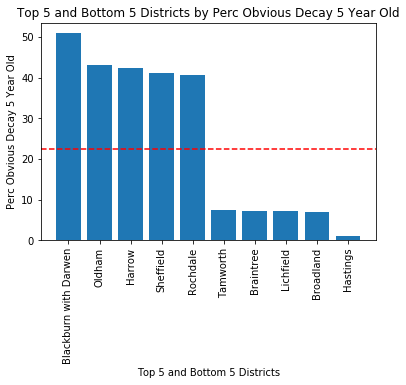

In [41]:
# show the top 5 and bottom 5 districts

#sort dataframe
var_rank = df[['District','Percentage_obvious_decay_5_year_old']]
var_rank = var_rank.sort_values(by=['Percentage_obvious_decay_5_year_old'], ascending = False)

#Get Top 5, Bottom 5 Districts and Mean
var_rank_head = var_rank.head()
var_rank_tail = var_rank.tail()

#Append to dataframes
frames = [var_rank_head, var_rank_tail]
var_top_bottom = pd.concat(frames)

# Pass the x and y cordinates of the bars to the
plt.bar(var_top_bottom['District'], var_top_bottom['Percentage_obvious_decay_5_year_old'])

# The following commands add labels to our figure.
plt.xlabel('Top 5 and Bottom 5 Districts')
plt.ylabel('Perc Obvious Decay 5 Year Old')
plt.title('Top 5 and Bottom 5 Districts by Perc Obvious Decay 5 Year Old')

# add horicontal line
y_value =var_rank['Percentage_obvious_decay_5_year_old'].mean()
plt.axhline(y_value, color='r', linestyle='dashed')

plt.xticks(rotation=90)

#add data labels on top of columns
#for a,b in zip(decay_top_bottom['District'], decay_top_bottom['Percentage_obvious_decay_5_year_old']): 
    #plt.text(a, b, str(b))
    
plt.show()

The visual shows how large the gap is between the worst and best district when it comes to cavities in children. Blackburn with Darwen shows a percentage of visual decay in 5 year olds of 50.9%, whilst Hastings only has 1.06%. The percentage of 5 year old with visual tooth decay for England overall is 22.5%.

**Number of Dental Practices per 10,000 Population**

Now we want to create a visual to show the top 5 and bottom Districts in terms of the number of NHS dental Prcatices per 10,000 Population. This is to show the stark differences within England.

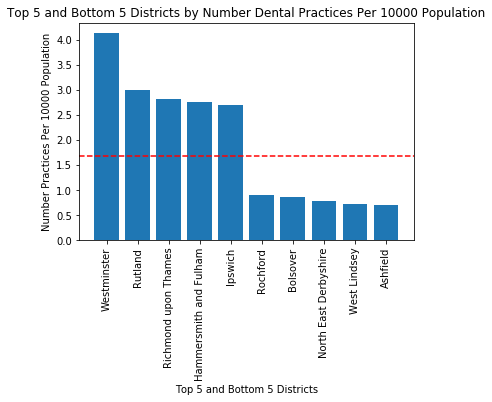

In [87]:
# show the top 5 and bottom 5 districts

#sort dataframe
var_rank = df[['District','Number_Dental_Practices_Per_10000_Population']]
var_rank = var_rank.sort_values(by=['Number_Dental_Practices_Per_10000_Population'], ascending = False)

#Get Top 5, Bottom 5 Districts and Mean
var_rank_head = var_rank.head()
var_rank_tail = var_rank.tail()

#Append to dataframes
frames = [var_rank_head, var_rank_tail]
var_top_bottom = pd.concat(frames)

# Pass the x and y cordinates of the bars to the
plt.bar(var_top_bottom['District'], var_top_bottom['Number_Dental_Practices_Per_10000_Population'])

# The following commands add labels to our figure.
plt.xlabel('Top 5 and Bottom 5 Districts')
plt.ylabel('Number Practices Per 10000 Population')
plt.title('Top 5 and Bottom 5 Districts by Number Dental Practices Per 10000 Population')

# add horicontal line
y_value =var_rank['Number_Dental_Practices_Per_10000_Population'].mean()
plt.axhline(y_value, color='r', linestyle='dashed')

plt.xticks(rotation=90)

#add data labels on top of columns
#for a,b in zip(decay_top_bottom['District'], decay_top_bottom['Percentage_obvious_decay_5_year_old']): 
    #plt.text(a, b, str(b))
    
plt.show()

The visual above shows again a very large gap between the worst and best district with regards to access to NHS dental care within the Districts. Westminster is clearly leading here with 4.1 NHS dental practices per 10,000 population, whilst Ashfield only has 0.7 practices or the same number of people. The average for England overall is 1.69.

**Number of Dental Practices per Square Kilometre**

Now we want to create a visual to show the top 5 and bottom Districts in terms of the number of NHS dental Prcatices per square kilometre. This is to show the stark differences within England.

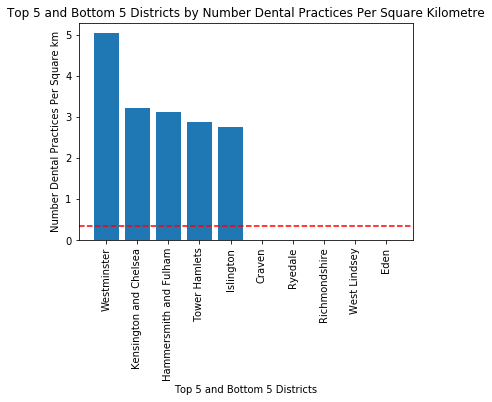

In [88]:
# show the top 5 and bottom 5 districts

#sort dataframe
var_rank = df[['District','Number_Dental_Practices_Per_Square_km']]
var_rank = var_rank.sort_values(by=['Number_Dental_Practices_Per_Square_km'], ascending = False)

#Get Top 5, Bottom 5 Districts and Mean
var_rank_head = var_rank.head()
var_rank_tail = var_rank.tail()

#Append to dataframes
frames = [var_rank_head, var_rank_tail]
var_top_bottom = pd.concat(frames)

# Pass the x and y cordinates of the bars to the
plt.bar(var_top_bottom['District'], var_top_bottom['Number_Dental_Practices_Per_Square_km'])

# The following commands add labels to our figure.
plt.xlabel('Top 5 and Bottom 5 Districts')
plt.ylabel('Number Dental Practices Per Square km')
plt.title('Top 5 and Bottom 5 Districts by Number Dental Practices Per Square Kilometre')

# add horicontal line
y_value =var_rank['Number_Dental_Practices_Per_Square_km'].mean()
plt.axhline(y_value, color='r', linestyle='dashed')

plt.xticks(rotation=90)

#add data labels on top of columns
#for a,b in zip(decay_top_bottom['District'], decay_top_bottom['Percentage_obvious_decay_5_year_old']): 
    #plt.text(a, b, str(b))
    
plt.show()

The chart reveals once again a large gap between the worst and best district regarding geographical access to NHS dental care within the Districts. Westminster came again top with 5 NHS dental practices per square kilometre. Eden on the other end has 0.005 per square kilometre. This seems intuitive since Westminster has a much greater population density than Eden. The average number of NHS dental practices per square kilometre is 0.35.

**Level of Deprivation**

Finally we create a visual to show the top 5 and bottom Districts in terms of level of deprivation. This is to show the stark differences within England.

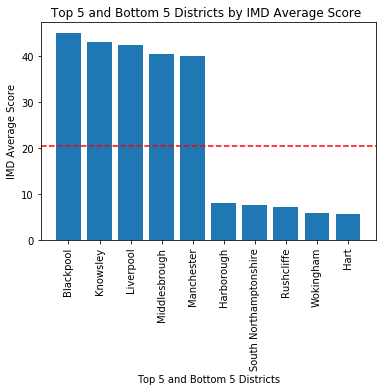

In [44]:
# show the top 5 and bottom 5 districts

#sort dataframe
var_rank = df[['District','IMD_Average_score ']]
var_rank = var_rank.sort_values(by=['IMD_Average_score '], ascending = False)

#Get Top 5, Bottom 5 Districts and Mean
var_rank_head = var_rank.head()
var_rank_tail = var_rank.tail()

#Append to dataframes
frames = [var_rank_head, var_rank_tail]
var_top_bottom = pd.concat(frames)

# Pass the x and y cordinates of the bars to the
plt.bar(var_top_bottom['District'], var_top_bottom['IMD_Average_score '])

# The following commands add labels to our figure.
plt.xlabel('Top 5 and Bottom 5 Districts')
plt.ylabel('IMD Average Score')
plt.title('Top 5 and Bottom 5 Districts by IMD Average Score ')

# add horicontal line
y_value =var_rank['IMD_Average_score '].mean()
plt.axhline(y_value, color='r', linestyle='dashed')

plt.xticks(rotation=90)

#add data labels on top of columns
#for a,b in zip(decay_top_bottom['District'], decay_top_bottom['Percentage_obvious_decay_5_year_old']): 
    #plt.text(a, b, str(b))
    
plt.show()

The column chart above highlights how much the Districts vary within England with regards to deprivation. Blackpool appears to be most deprived District with an average IMD score of 45, whilst Hart is the least deprived with 5.5. The average score for England is 20.4.

**Visualise the Center Points of the Districts on a Map**

Show districts on the map.

In [45]:
#location data for center of England = 52.8140, 1.6371

districts_map = folium.Map(location=[52.8140, 1.6371], zoom_start=6) # generate map centering in the middle of England

# add markers to map
for lat, lng, District in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(districts_map)  

# display map
districts_map

## Part V: Clustering <a class="anchor" id="fifth-bullet"></a>

**Normalize the dataset over the standard deviation**

We only apply the normarlising to to certain variables. These are: Percentage_obvious_decay_5_year_old, Number_Dental_Practices_Per_10000_Population and Number_Dental_Practices_Per_Square_km.  

In [46]:
X = df.values[:,(1,7,8,9)]
X

array([[50.9045, 36.013000000000005, 2.070863616930312,
        0.2262409099500751],
       [43.1704, 33.155, 1.8135042807135928, 0.3020831429348523],
       [42.4278, 15.030999999999999, 2.269469660774009,
        1.1295335884159357],
       ...,
       [7.2831, 12.565999999999999, 1.7182786666157548,
        0.054332350877688895],
       [6.9917, 11.817, 1.4527882064182653, 0.03441650925577176],
       [1.0597, 34.281, 2.374245907123817, 0.7383518618002078]],
      dtype=object)

Now we perform the normalisation using StandardScaler from sklearn.

In [47]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 3.33394618,  1.96897534,  0.8575939 , -0.2041931 ],
       [ 2.42607029,  1.60859093,  0.28327755, -0.07835313],
       [ 2.33889937, -0.6767859 ,  1.30079795,  1.29458031],
       ...,
       [-1.78660014, -0.9876143 ,  0.07077456, -0.48942953],
       [-1.82080645, -1.08206073, -0.521687  , -0.52247456],
       [-2.51714083,  1.75057583,  1.53461388,  0.64551851]])

**Assess Multicolinearity among the Features**

If two or more variables (or features) are highly correlated, these features would then have a higher impact on the model which may lead to unintended clsutering results (i.e. clusters are skewed towards those variables). Let's look at the correlation of some key variables. 

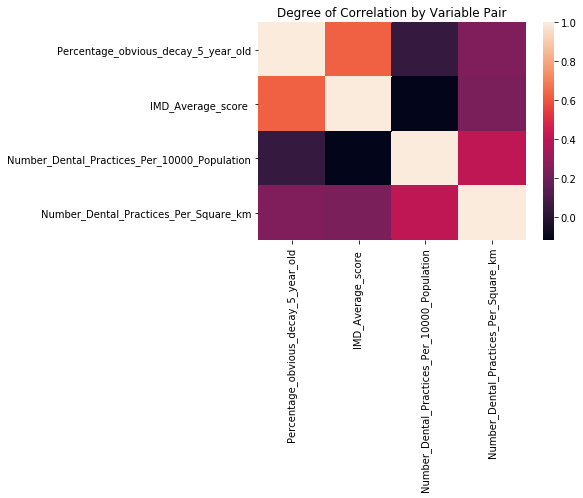

In [91]:
# Correlation Heatmap
cor_data = df[['Percentage_obvious_decay_5_year_old','IMD_Average_score ', 'Number_Dental_Practices_Per_10000_Population', 'Number_Dental_Practices_Per_Square_km']]
sns.heatmap(cor_data.corr()).set_title('Degree of Correlation by Variable Pair');


Let's create two 2-dimensational scatter plots of the pairs with the strongest correlations.

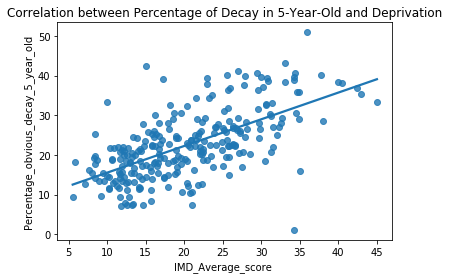

In [92]:
ax = sns.regplot(x="IMD_Average_score ", y="Percentage_obvious_decay_5_year_old", data=df, ci = None).set_title('Correlation between Percentage of Decay in 5-Year-Old and Deprivation')

In [50]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(df['IMD_Average_score '], df['Percentage_obvious_decay_5_year_old'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.627


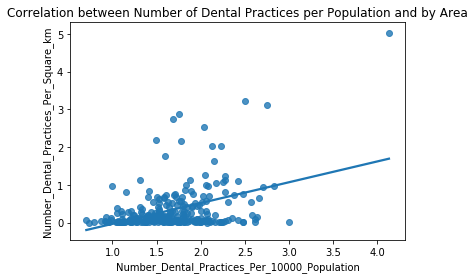

In [93]:
ax = sns.regplot(x="Number_Dental_Practices_Per_10000_Population", y="Number_Dental_Practices_Per_Square_km", data=df, ci = None).set_title('Correlation between Number of Dental Practices per Population and by Area')

In [52]:
# calculate Pearson's correlation
corr, _ = pearsonr(df['Number_Dental_Practices_Per_10000_Population'], df['Number_Dental_Practices_Per_Square_km'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.410


Since we have observed multicollinerity within our features set (especially tooth decay in children and deprivation), we could either drop one of the variables or perform a Principle Component Analysis (PCA). Droping one variable might be easy but we might then lose some important information. PCA allows us to reduce the dimensionality without losing the information. It puts similar features into groups so that each group is equally weighted or treated by the algorithm when finding the best clusters.  

**Principle Component Anlsysis**

We are now performing a principla component analysis account for the multicolinerity identified above and without losing valuable information. First, we need to define the dataset.

In [53]:
pca = PCA()
pca.fit(Clus_dataSet)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Let's decide how many features we want to keep usin the cumulative variance plot.

In [54]:
pca.explained_variance_ratio_

array([0.44840457, 0.33031847, 0.13631094, 0.08496602])

Text(0, 0.5, 'Cumulative Explained Variance')

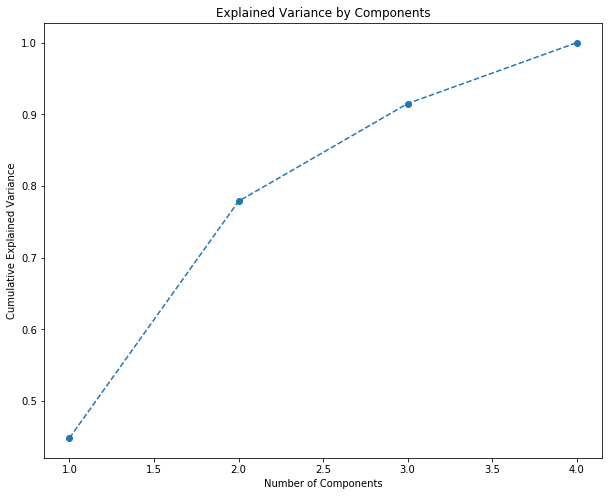

In [55]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

A good rule of thumb is to choose the number of components that preserves 80% of the variance. Based on the above graph 2 Components should be chosen.

We now perfome the PCA with 2 Components.

In [56]:
pca = PCA(n_components = 2)

In [57]:
pca.fit(Clus_dataSet)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pca.transform(Clus_dataSet)

array([[ 3.33425349e+00, -9.82095055e-01],
       [ 2.50149692e+00, -9.97447903e-01],
       [ 1.89337711e+00,  1.31444642e+00],
       [ 1.72576343e+00, -1.15917925e+00],
       [ 2.41825391e+00, -8.93156697e-01],
       [ 2.12356843e+00, -2.45097435e-01],
       [ 2.86535708e+00,  1.12654125e+00],
       [ 2.49999922e+00, -1.28196909e+00],
       [ 3.80701865e+00,  1.40464413e+00],
       [ 2.21242594e+00, -1.18910391e+00],
       [ 1.64116715e+00, -1.70758108e+00],
       [ 1.95095727e+00, -7.10891053e-01],
       [ 1.13774119e+00, -1.05347823e+00],
       [ 1.52909754e+00,  4.70573729e-01],
       [ 2.48649163e+00, -5.56083607e-01],
       [ 2.62621926e+00,  2.26525302e-01],
       [ 1.80248998e+00, -1.71525559e+00],
       [ 3.10424446e+00, -6.78502733e-01],
       [ 2.44510951e+00, -2.19348319e+00],
       [ 1.59173274e+00, -3.60146489e-01],
       [ 1.46052995e+00, -1.07093091e+00],
       [ 1.56598905e+00, -1.33571330e+00],
       [ 2.90283294e+00, -1.45612876e+00],
       [ 1.

In [59]:
scores_pca = pca.transform(Clus_dataSet)

The obtianed PCA scores will replace our orginal feature set and be fed into the clustering algoritm to determine the best clusters.

**Find the best K**

The number of clusters K is set by us. Using the scree plot method, also called Elbow-Method we can identify the best K.

Running K-Means with a range of k:

In [60]:
sum_squared_distances = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scores_pca)
    sum_squared_distances.append(kmeanModel.inertia_)
    
print(sum_squared_distances)

[822.3315283213306, 496.74115408578683, 337.07451818175, 271.63371807128317, 217.37612303871242, 173.88880625109306, 145.79904728694297, 123.4120546306601, 108.92299828626918]


Plotting the sum_squared_distances of K-Means (Scree Plot)

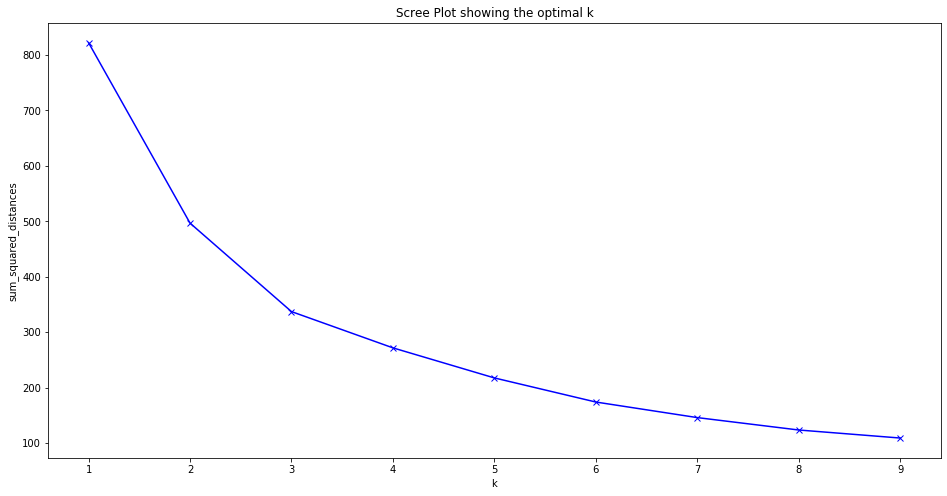

In [61]:
plt.figure(figsize=(16,8))
plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_squared_distances')
plt.title('Scree Plot showing the optimal k')
plt.show()

From the Scree Plot above we can see that 3 clusters is probably the best K, i.e. number of clusters, as the improvement to K=4, K=5 and so on is only marginal and therfore would not add further information to the model.

**Run the K-Means Algorithm**

In [62]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scores_pca)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels = labels + 1 #so that the first cluster has the label 1 and not 0
print(labels)

[3 3 2 3 3 3 2 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 3 3 3
 3 2 3 3 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 2 2 3 2 2 3 2 2 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 1 3 3 1 1 3 3 2 1 1 3 3 3 1 1 2 1 2 1 1 1 3 2 3 1 1 3 3 1 3 1 3 1
 1 3 3 3 1 1 2 1 3 3 1 2 2 1 3 3 2 1 1 1 1 1 2 2 1 3 1 1 2 2 1 1 1 1 3 2 1
 3 1 1 1 3 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 3 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2]


**Visualise the Map with Clusters**

Let's create a new dataframe that includes the cluster lables and District information.

In [63]:
df["Cluster"] = labels
df.head(5)

,District,Percentage_obvious_decay_5_year_old,Number_of_Dental_Practices,Longitude,Latitude,Area_square_km,Population,IMD_Average_score,Number_Dental_Practices_Per_10000_Population,Number_Dental_Practices_Per_Square_km,Cluster
0,Blackburn with Darwen,50.9045,31.0,-2.46360,53.700802,137.022080,149696.0,36.013,2.070864,0.226241,3
1,Oldham,43.1704,43.0,-2.05274,53.557678,142.344917,237110.0,33.155,1.813504,0.302083,3
2,Harrow,42.4278,57.0,-0.33603,51.594669,50.463307,251160.0,15.031,2.269470,1.129534,2
3,Sheffield,41.0425,90.0,-1.54254,53.403580,367.930015,584853.0,27.060,1.538848,0.244612,3
4,Rochdale,40.6953,42.0,-2.14784,53.607410,158.128175,222412.0,34.415,1.888387,0.265607,3


Let's visualise clusters on Map.

In [64]:
# create map
map_clusters = folium.Map(location=[52.8140, 1.6371], zoom_start=6) # generate map centering in the middle of England

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['District'], df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Plotting the clusters now on the England map shows some clear geographic pockets. Cluster 3, in red, is heavily concentrated around the North West of England. Pockets of Cluster 3 can also be found near Newcastle, along the Mid East coast and in the East of London. Cluster 2 in light green is largely concentrated in London, where concentration of NHS dental practices is the highest. The rest of the country is filled with Cluster 1 (violet).

**Examine each Cluster to Find the Best Labels**

Let's calcualte the average values for our three varaibles in each cluster, which will help us determine the differences between the clusters and assign a name to each cluster.

In [65]:
#calculate the averages of each cluster
cluster_averages = df.groupby(['Cluster']).mean()
col_list = ['Percentage_obvious_decay_5_year_old','IMD_Average_score ','Number_Dental_Practices_Per_10000_Population','Number_Dental_Practices_Per_Square_km']
cluster_averages = cluster_averages[col_list]

#calculate the size of each cluster, which is the number of districts
cluster_size = df.groupby(['Cluster']).count()
col_list = ['District']
cluster_size = cluster_size[col_list]
cluster_size = cluster_size.rename(columns = {'District':'Number_of_Districts'})
cluster_size

#merge the number of clusters back to the averages table so it's all in one table
cluster_averages = pd.merge(cluster_averages, cluster_size, on=["Cluster"], how='left')

#calculate percentage of total each cluster, so that we get a feel for the size of each cluster
cluster_averages['Perc_Number_of_District_of_Total'] = cluster_averages['Number_of_Districts']/(cluster_averages['Number_of_Districts'].sum())*100

#reorder columns
col_list = ['Number_of_Districts', 'Perc_Number_of_District_of_Total', 'Percentage_obvious_decay_5_year_old', 'IMD_Average_score ', 'Number_Dental_Practices_Per_10000_Population', 'Number_Dental_Practices_Per_Square_km']
cluster_averages = cluster_averages[col_list]

#round the numbers off to show only one decimal place after comma to improve readability
cluster_averages = cluster_averages.round(2)
cluster_averages.reset_index(inplace=True)
cluster_averages


,Cluster,Number_of_Districts,Perc_Number_of_District_of_Total,Percentage_obvious_decay_5_year_old,IMD_Average_score,Number_Dental_Practices_Per_10000_Population,Number_Dental_Practices_Per_Square_km
0,1,140,53.03,17.15,15.05,1.66,0.11
1,2,35,13.26,25.17,21.05,2.26,1.44
2,3,89,33.71,29.87,28.56,1.51,0.30


In addition to the above table, we need to investigate the clusters a bit more by looking at the distributions. The averages themselves may not tell the whole story. Boxplots and Descriptive Statistics will help to shed light into the clusters.

In [94]:
# write final csv file so it can be further explored and visualised in Power Bi for example
cluster_averages.to_csv(r'C:\\Users\\P10262425\\OneDrive - Capita\\Documents\\IBM Data Science\\cluster_averages.csv', index = True)

## Part VI: Exploration of Clusters <a class="anchor" id="seventh-bullet"></a>

**Visualise Clusters via Boxplots**

Let's examine each cluster by plotting a boxplot for each cluster and original feature. This will allow us to investigate the mean and distrubtion of data within each cluster.

Text(0.5, 1.0, 'Percentage Decay in 5 Year-Olds by Cluster')

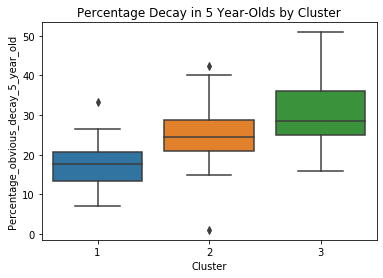

In [83]:
sns.boxplot(x='Cluster',y='Percentage_obvious_decay_5_year_old',data=df).set_title('Percentage Decay in 5 Year-Olds by Cluster')

The above boxplot shows the distribution of data by cluster and where most data points are concentrated (i.e. coloured boxes). It shows that all clusters seem to be heterogeneous and homogeneous with regards to decay in children, meaning that the coloured boxes do not overlap too a great extent. For example, the 75% percentile (i.e. upper black line of the box) for cluster 1 is lower than the 25% percentile of cluster 2.

Text(0.5, 1.0, 'IMD Average Score by Cluster')

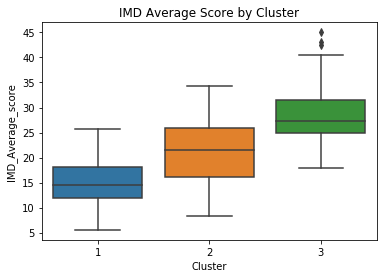

In [84]:
sns.boxplot(x='Cluster',y='IMD_Average_score ',data=df).set_title('IMD Average Score by Cluster')

With regards to deprivation levels all clusters appear to be fairly heterogeneous and homogeneous. For example the 75% percentile (i.e. upper black line of the box) for cluster 1 is lower than the 25% percentile of cluster 2. The mean IMD score for cluster 1 (middle black line of the blue box) is lower than the 25% percentile of cluster 2.

Text(0.5, 1.0, 'Number Dental Practices per 10,000 Population by Cluster')

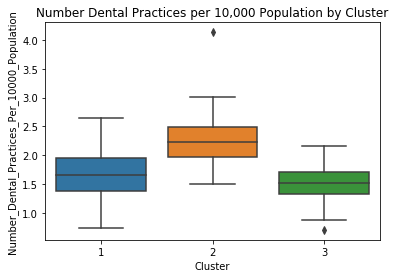

In [85]:
sns.boxplot(x='Cluster',y='Number_Dental_Practices_Per_10000_Population',data=df).set_title('Number Dental Practices per 10,000 Population by Cluster')

In terms of Number of Dental Practices per 10,000 Population, Cluster 2 is very distinct from the other two clusters. However, cluster 1 and 3 do overlap to some extent. Cluster 3 is a bit more compressed which means that the data points are less spread. Cluster 1 shows a bit more variation.  

Text(0.5, 1.0, 'Number Dental Practices per Square Kilometre by Cluster')

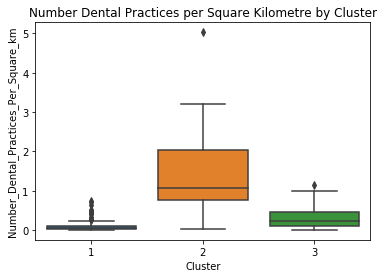

In [86]:
sns.boxplot(x='Cluster',y='Number_Dental_Practices_Per_Square_km',data=df).set_title('Number Dental Practices per Square Kilometre by Cluster')

The boxplot for the number of dental surgeries per square kilometre demonstrates that the k-mean algorithm has done a good job in putting the data into very distinct clusters. The difference between cluster 1 and 3 is not massive, but cluster one is extremely compressed whilst cluster 3 shows a bit more variations. Cluster 2 sits apart from the other two clusters and is more significantly more spread.  

**Descriptive Statistics**

In [76]:
dd = df[['Cluster','Percentage_obvious_decay_5_year_old','IMD_Average_score ','Number_Dental_Practices_Per_10000_Population','Number_Dental_Practices_Per_Square_km']]
dd[dd['Cluster']==1].describe()

,Cluster,Percentage_obvious_decay_5_year_old,IMD_Average_score,Number_Dental_Practices_Per_10000_Population,Number_Dental_Practices_Per_Square_km
count,140.0,140.000000,140.000000,140.000000,140.000000
mean,1.0,17.151029,15.047757,1.658202,0.105821
std,0.0,5.021145,4.230231,0.407008,0.143638
min,1.0,6.991700,5.544000,0.731705,0.005101
25%,1.0,13.351925,11.973000,1.375495,0.022790
50%,1.0,17.705050,14.533500,1.651662,0.046675
75%,1.0,20.797475,18.198750,1.946597,0.115339
max,1.0,33.394600,25.790000,2.638632,0.743870


In [77]:
dd[dd['Cluster']==2].describe()

,Cluster,Percentage_obvious_decay_5_year_old,IMD_Average_score,Number_Dental_Practices_Per_10000_Population,Number_Dental_Practices_Per_Square_km
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2.0,25.166334,21.053171,2.261346,1.437275
std,0.0,8.259345,6.355838,0.483156,1.041799
min,2.0,1.059700,8.381000,1.494024,0.030476
25%,2.0,21.031700,16.181500,1.976500,0.764529
50%,2.0,24.504900,21.526000,2.233414,1.073503
75%,2.0,28.869750,25.850500,2.483306,2.035262
max,2.0,42.427800,34.281000,4.132911,5.028599


In [78]:
dd[dd['Cluster']==3].describe()

,Cluster,Percentage_obvious_decay_5_year_old,IMD_Average_score,Number_Dental_Practices_Per_10000_Population,Number_Dental_Practices_Per_Square_km
count,89.0,89.000000,89.000000,89.000000,89.000000
mean,3.0,29.874335,28.557045,1.505139,0.304462
std,0.0,6.941925,5.635959,0.290858,0.265782
min,3.0,15.874800,17.896000,0.703576,0.010754
25%,3.0,24.933200,24.988000,1.331101,0.099650
50%,3.0,28.570300,27.301000,1.513735,0.226241
75%,3.0,35.963400,31.509000,1.712226,0.458079
max,3.0,50.904500,45.039000,2.165788,1.138039


**Visualise Clusters on a Scatter Plot**

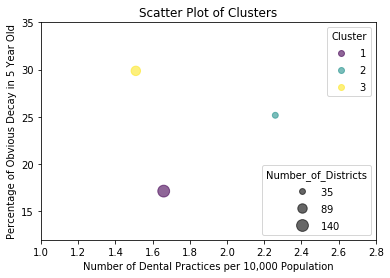

In [66]:
x = cluster_averages['Number_Dental_Practices_Per_10000_Population']
y = cluster_averages['Percentage_obvious_decay_5_year_old']
c = cluster_averages['Cluster']
s = cluster_averages['Number_of_Districts']

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s,alpha=0.6)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(alpha=0.6),
                    loc="upper right", title="Cluster")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
plt.legend(*scatter.legend_elements("sizes"),
                    loc="lower right", title="Number_of_Districts",)


# Set plot title and axes labels
ax.set(title = "Scatter Plot of Clusters",
       xlabel = "Number of Dental Practices per 10,000 Population",
       ylabel = "Percentage of Obvious Decay in 5 Year Old")

# set range of axes
plt.xlim([1, 2.8])
plt.ylim([12, 35])

plt.show()

The above Scatter Plot is another display of the differences and similiarities of the final clusters. It shows that cluster 3 (yellow bubble) is the least healthy when it comes to denatl health whilst having the fewest numbers of affordable dental practices per population. 

**Summary**

**Cluster 1:**
Cluster 1 is the largest cluster with 140 Districts and contains areas with the greatest levels of dental health and lowest levels of deprivation. The mean percentage of obvious tooth decay in 5-year-olds in this cluster is 17.5% which is much lower than the national average of 22.5%. The number of NHS dental practices per 10,000 population is only slightly below 1.69 which is the average in England. The number of practices per square kilometre however appears to be quite low with 0.11, compared to the national average of 0.35. This suggests that inhabitants in those districts may have to travel large distances to be seen by the next NHS dentist. 

**Cluster 2:**
Cluster 2 is the smallest cluster containing 35 Districts. This cluster stands out because of its high concentration of dental surgeries per population and surface area. It contains Districts such as Westminster or Fulham in London where population density is among the highest in country. The local authorities in those Districts provide their residents with great access to affordable NHS dental care.

**Cluster 3:**
Cluster 3 is the second largest cluster with 89 Districts. It is the cluster with the highest mean deprivation scores and percentage of tooth decay in children. The spread of the data also confirms that the clusters are very distinct from each other. On average in this cluster, there are 1.5 of dental practices per 10,000 population, which is much lower than the national average of 1.69. Furthermore, the boxplot revealed that the data for this variable is fairly compressed, meaning not many districts in this cluster have more than 1.69 surgeries per 10,000 population. In summary the clustering algorithm showed that cluster 3 requires greater access to affordable dental practices as inhabitants in those districts are they are most deprived, had lowest levels of dental health in children and had fewest numbers of surgeries by population. More NHS dental practices in those areas would help deprived people to get access to much needed and affordable dental care in an attempt to improve oral health in children and therefore for the future population of England.


**Write CSV**

In [67]:
# write final csv file so it can be further explored and visualised in Power Bi for example
df.to_csv(r'C:\\Users\\P10262425\\OneDrive - Capita\\Documents\\IBM Data Science\\cluster_data.csv', index = True)

## References <a class="anchor" id="sixth-bullet"></a>

Appleby, J., & Reed, R. (2017). Root causes - Quality and Inequality in Dental Health. London: QualityWatch.
Digital NHS. (2021, January 31). Miscellaneous. Retrieved from Miscellaneous: https://digital.nhs.uk/services/organisation-data-service/data-downloads/miscellaneous

Ministry of Housing, Communities & Local Government. (2019, September 26). English Indices of Deprivation 2019. UK. Retrieved January 31, 2021, from https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019

National Audit Office. (2020). Dentistry in England. National Audit Office.
Office for National Statistics. (2021, January 31). Geoportal Statistics. Retrieved from Local Authority Districts (December 2019) Boundaries UK BFC: https://geoportal.statistics.gov.uk/datasets/1d78d47c87df4212b79fe2323aae8e08_0/data

Office for National Statistics. (2021, January 31). Nomis - Official Labour Market Statistics. Retrieved from Population estimates - local authority based by single year of age: https://www.nomisweb.co.uk/query/construct/summary.asp?reset=yes&mode=construct&dataset=2002&version=0&anal=1&initsel=

Public Health England. (2021, January 31). Public Health Profiles. Retrieved from fingertips.phe: https://fingertips.phe.org.uk/search/dental#page/0/gid/1/pat/6/par/E12000004/ati/102/are/E06000015/cid/4/tbm/1/page-options/ovw-do-0